In [32]:
import numpy as np
import random as rnd

In [33]:
n_particles = 5

In [35]:
def rastrigin(A, n, x):
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

A = 2
n = 5
x_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

print(rastrigin(A, n, x_values))

12.549999999999999


In [49]:
def create(particles, interval, dimension):
    points = []
    for i in range(dimension):
        if dimension != len(interval):
            points.append([np.random.uniform(interval[0], interval[1]) for _ in range(particles)])
        else:
            points.append([np.random.uniform(interval[i][0], interval[i][1]) for _ in range(particles)])
    return np.array(points)

mas = create(5, [-5.12, 5.12], 4)
print(mas)

[[-2.93933023 -0.64236706 -0.80263671 -4.55969406 -5.01827898]
 [ 2.96720056 -2.30079264  2.22965765 -0.80531536 -3.65224067]
 [-3.14857799 -1.90653201  3.12494251 -4.9907115  -4.61715484]
 [ 0.67584394  1.91294153  2.32254367 -0.20793588 -1.35519517]]


In [51]:
tes = [[ 0.5655608 , -0.69037718, -0.66941735, -1.21317279,  0.61758203,
         0.74657155, -1.1650805 ,  0.22332784, -0.61667776,  0.20119401,
        -0.26724734, -1.02786942,  1.33860421,  0.41267099, -0.61746776,
        -0.47173478, -0.54698625,  0.77602699,  0.89303941, -0.60796701,
        -0.07104274, -0.57777087,  1.14259898, -0.97693525, -1.40443467,
        -0.15498161, -0.7620465 , -1.14278871,  0.3504037 , -0.67931411],
       [ 2.05491345,  1.2177302 ,  0.36913513,  2.1512541 ,  1.03945368,
        -0.32641905,  0.63095451,  1.03871146,  1.95462286,  0.90901393,
         2.12619014,  1.35085854, -0.09574936, -0.06200943,  1.28902566,
         0.49805736,  1.26423187,  0.04161151,  1.56898894,  0.31628276,
         0.23321993,  0.75222503,  1.950716  ,  2.25463777,  0.61605936,
        -0.24467278,  2.19785937,  1.99748144, -0.35739807,  1.26555241]], [[ 0.51275489, -0.58325197, -0.60667071, -1.14474785,  0.44239874,
         0.69885997, -1.08890698,  0.25571223, -0.5379383 ,  0.04386936,
        -0.28037867, -0.94892326,  1.1770668 ,  0.36993712, -0.50814986,
        -0.42021905, -0.45784405,  0.69536808,  0.85888528, -0.65137395,
        -0.00309111, -0.61694373,  1.06669881, -0.81628792, -1.40814418,
        -0.05581167, -0.68849731, -1.23162395,  0.22761312, -0.52697858],
       [ 1.81275266,  1.19466207,  0.42248561,  1.95578039,  1.01336962,
        -0.38820636,  0.57779874,  0.95013572,  1.73506635,  0.92769333,
         1.92362694,  1.2656255 ,  0.04843805, -0.05981834,  1.17228388,
         0.45861481,  1.12478672,  0.04078588,  1.34616899,  0.31896569,
         0.31742477,  0.75129265,  1.84524908,  2.12191909,  0.58463614,
        -0.19965332,  2.09194405,  1.76115303, -0.37944633,  1.05766652]]


print([i[0] for i in tes])
print([i[1] for i in tes])

[[0.5655608, -0.69037718, -0.66941735, -1.21317279, 0.61758203, 0.74657155, -1.1650805, 0.22332784, -0.61667776, 0.20119401, -0.26724734, -1.02786942, 1.33860421, 0.41267099, -0.61746776, -0.47173478, -0.54698625, 0.77602699, 0.89303941, -0.60796701, -0.07104274, -0.57777087, 1.14259898, -0.97693525, -1.40443467, -0.15498161, -0.7620465, -1.14278871, 0.3504037, -0.67931411], [0.51275489, -0.58325197, -0.60667071, -1.14474785, 0.44239874, 0.69885997, -1.08890698, 0.25571223, -0.5379383, 0.04386936, -0.28037867, -0.94892326, 1.1770668, 0.36993712, -0.50814986, -0.42021905, -0.45784405, 0.69536808, 0.85888528, -0.65137395, -0.00309111, -0.61694373, 1.06669881, -0.81628792, -1.40814418, -0.05581167, -0.68849731, -1.23162395, 0.22761312, -0.52697858]]
[[2.05491345, 1.2177302, 0.36913513, 2.1512541, 1.03945368, -0.32641905, 0.63095451, 1.03871146, 1.95462286, 0.90901393, 2.12619014, 1.35085854, -0.09574936, -0.06200943, 1.28902566, 0.49805736, 1.26423187, 0.04161151, 1.56898894, 0.31628276, 

In [37]:
def rastrigin(x, A=10):
    n = len(x)
    return A * n + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

print(rastrigin(mas))

[115.15342159 191.95763637 215.98700668 138.87265861 224.79359439]


# Code

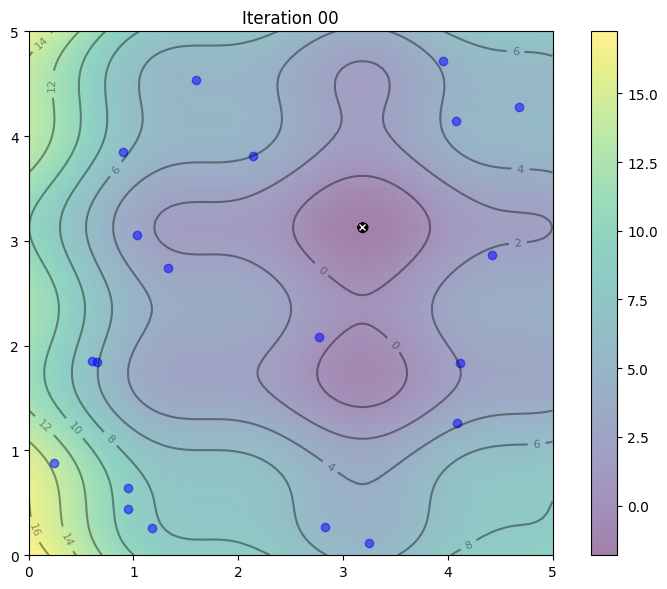

In [ ]:
import numpy as np
from functions import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
iterations = 50

values = {'X':[], 'pbest': []}

# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    for _ in range(iterations):
        global V, X, pbest, pbest_obj, gbest, gbest_obj
        r1, r2 = np.random.rand(2)
        V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
        X = X + V
        obj = f(X[0], X[1])
        pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
        pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
        gbest = pbest[:, pbest_obj.argmin()]
        gbest_obj = pbest_obj.min()
        values['X'].append(X)
        values['pbest'].append(pbest)
    
update()

#---------------------------------------------------------------------------------------------

# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

# points
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)

def animate(i):
    # if i == iterations:
    #     return
    # print(i)
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(values['pbest'][i].T)
    p_plot.set_offsets(values['X'][i].T)
    
    return ax, pbest_plot, p_plot

anim = FuncAnimation(fig, animate,  frames=len(values['X']), interval=200, blit=False, repeat=False)
#anim = FuncAnimation(fig, animate, interval=500)
anim.save("PSO.gif", dpi=120, writer="pillow")

# print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
# print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))